In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Consertando a exibição do describe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Ignorando avisos de depreciação
warnings.filterwarnings('ignore')
# Configurando o pyplot
plt.figure(figsize=(20, 12))

%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<Figure size 2000x1200 with 0 Axes>

In [3]:
# Carregando os dados do ENEM 2023
enemData = pd.read_csv('./Preprocessamento/PreprocessedDataframe.csv', encoding='utf-8', sep=';')

In [4]:
# Calculando a matriz de correlação
corr = enemData.corr()
corr

,TP_ST_CONCLUSAO,SG_UF_PROVA_NUM,Q006,Q010,Q011,PRESENCA_COMPLETA,GRUPO_ETARIO
TP_ST_CONCLUSAO,1.00,0.04,0.19,0.20,0.06,0.20,-0.52
SG_UF_PROVA_NUM,0.04,1.00,0.19,0.20,-0.05,0.02,-0.06
Q006,0.19,0.19,1.00,0.62,0.01,0.15,-0.15
Q010,0.20,0.20,0.62,1.00,0.07,0.14,-0.19
Q011,0.06,-0.05,0.01,0.07,1.00,0.02,-0.07
PRESENCA_COMPLETA,0.20,0.02,0.15,0.14,0.02,1.00,-0.25
GRUPO_ETARIO,-0.52,-0.06,-0.15,-0.19,-0.07,-0.25,1.00


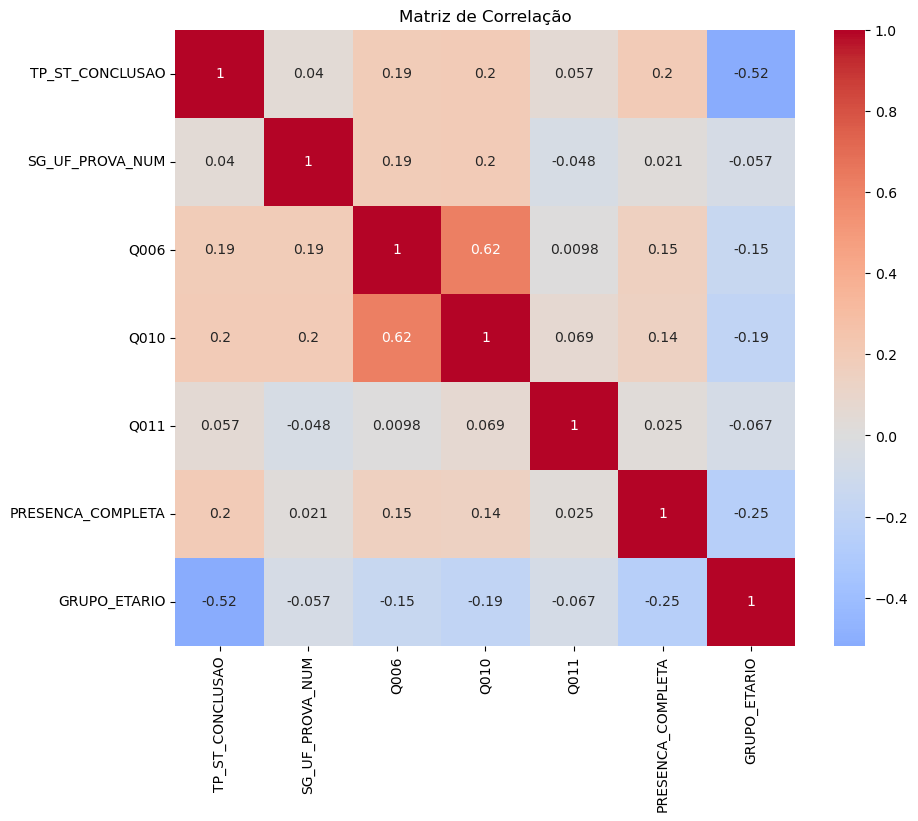

In [5]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

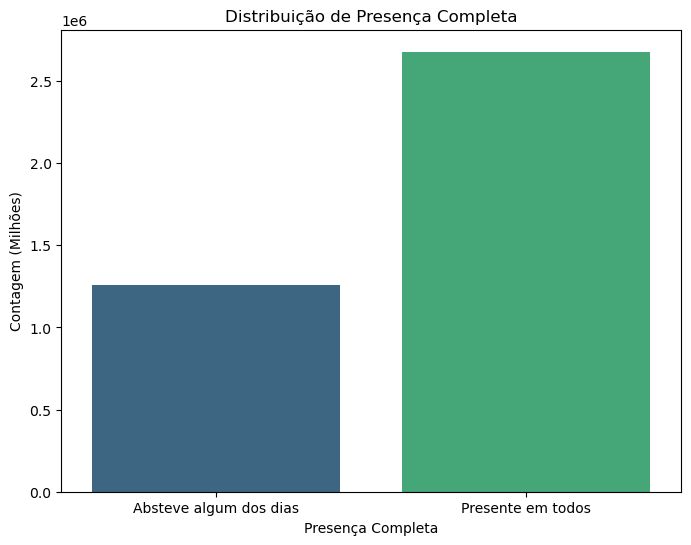

In [8]:
# Gráfico de barras para a presença completa
plt.figure(figsize=(8, 6))
sns.countplot(x='PRESENCA_COMPLETA', data=enemData, palette='viridis')
plt.title('Distribuição de Presença Completa')
plt.xlabel('Presença Completa')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0,1], labels=['Absteve algum dos dias', 'Presente em todos'])
plt.show()

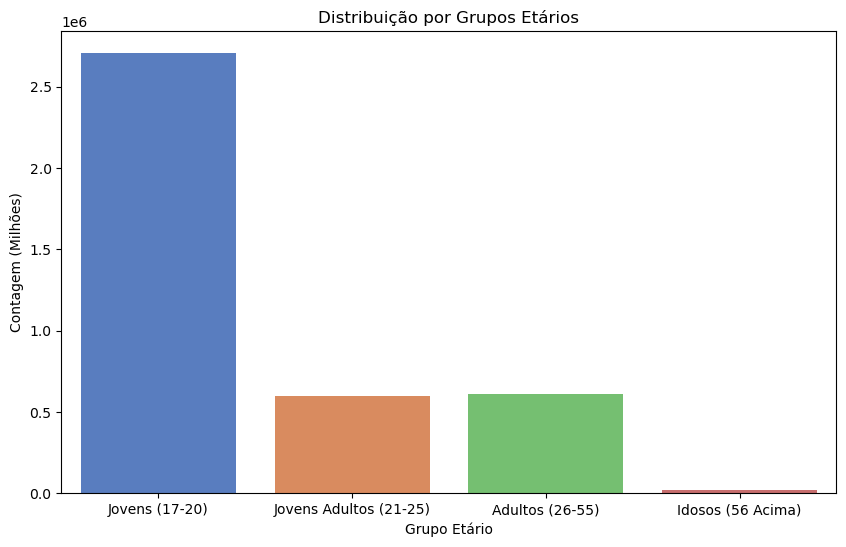

In [9]:
# Gráfico de distribuição de grupos etários
plt.figure(figsize=(10, 6))
sns.countplot(x='GRUPO_ETARIO', data=enemData, palette='muted')
plt.title('Distribuição por Grupos Etários')
plt.xlabel('Grupo Etário')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jovens (17-20)', 'Jovens Adultos (21-25)', 'Adultos (26-55)', 'Idosos (56 Acima)'])
plt.show()

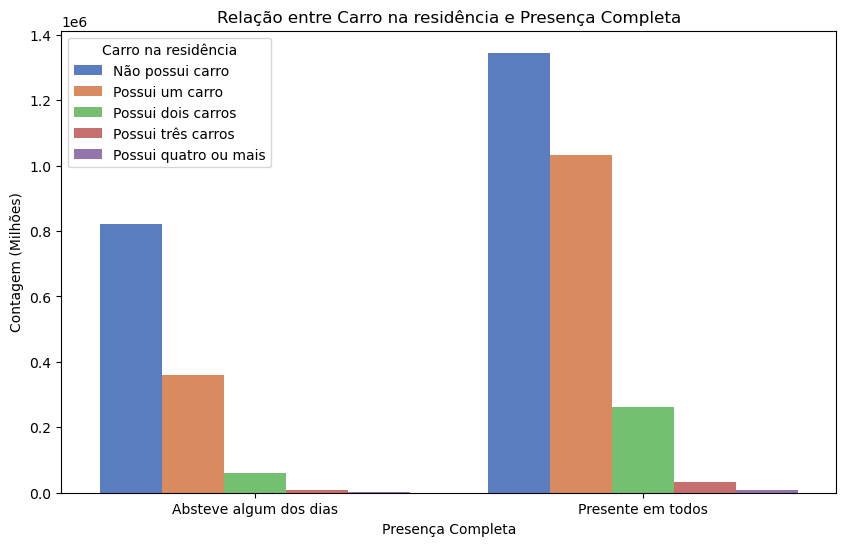

In [16]:
# Relação acesso internet e presença
plt.figure(figsize=(10, 6))
sns.countplot(x='PRESENCA_COMPLETA', hue='Q010', data=enemData, palette='muted')
plt.title('Relação entre Carro na residência e Presença Completa')
plt.xlabel('Presença Completa')
plt.ylabel('Contagem (Milhões)')
plt.legend(title='Carro na residência', loc='upper left', labels=['Não possui carro', 'Possui um carro', 'Possui dois carros', 'Possui três carros','Possui quatro ou mais'])
plt.xticks(ticks=[0,1], labels=['Absteve algum dos dias', 'Presente em todos'])
plt.show()

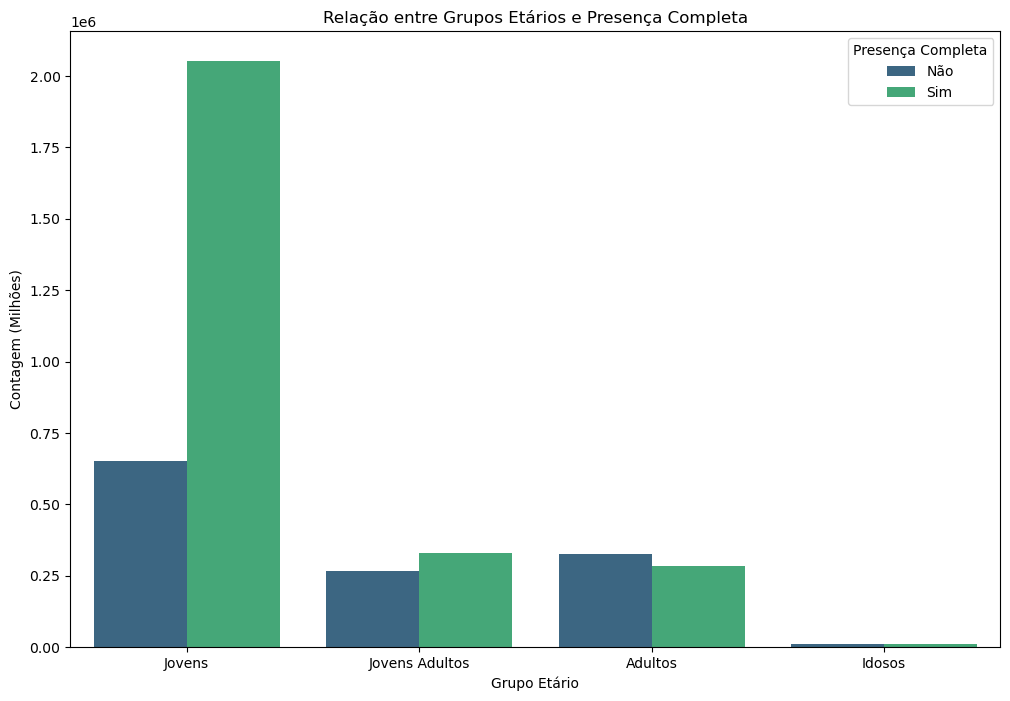

In [11]:
# Criando gráfico de presença por grupos etários
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='GRUPO_ETARIO', hue='PRESENCA_COMPLETA', data=enemData, palette='viridis')


plt.title('Relação entre Grupos Etários e Presença Completa')
plt.xlabel('Grupo Etário')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jovens', 'Jovens Adultos', 'Adultos', 'Idosos'])
plt.legend(title='Presença Completa', loc='upper right', labels=['Não', 'Sim'])
plt.show()


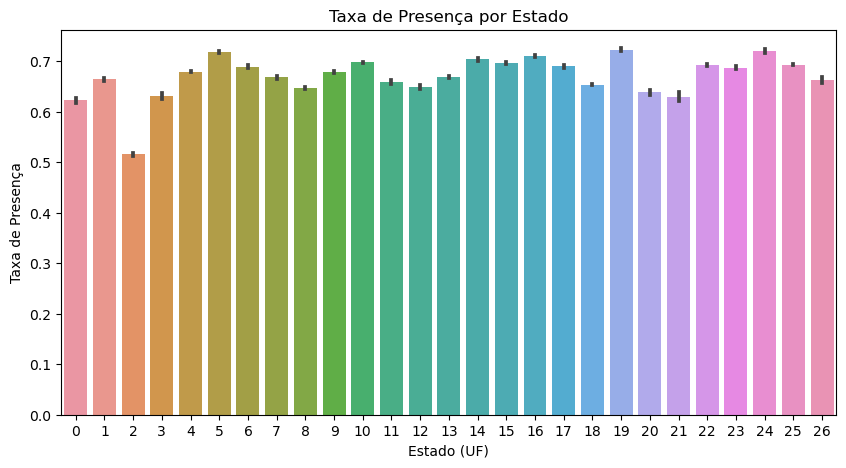

In [12]:
# Criando gráfico de presença por estado
plt.figure(figsize=(10,5))
sns.barplot(x='SG_UF_PROVA', y='PRESENCA_COMPLETA', data=enemData)
plt.xlabel('Estado (UF)')
plt.ylabel('Taxa de Presença')
plt.title('Taxa de Presença por Estado')
plt.show()